In [98]:
import pandas as pd
import matplotlib as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
classification_report, plot_confusion_matrix, plot_roc_curve


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

In [4]:
df.dropna(subset = ['RainTomorrow'], inplace = True)

In [5]:
df.drop(columns = ['Evaporation', 'Date', 'Sunshine'], inplace=True, axis=1)

In [6]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    132863 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     132180 non-null  object 
 7   WindDir3pm     138415 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Cloud9am       88536 non-null   float64
 15  Cloud3pm       85099 non-null   float64
 16  Temp9am        141289 non-null  float64
 17  Temp3pm        139467 non-nul

In [8]:
df2 = df.copy()

In [9]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features:
    qupper = df2[feature].quantile(0.99)
    df2 = df2.loc[(df2[feature].isna()) | (df2[feature] < qupper)]

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124011 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       124011 non-null  object 
 1   MinTemp        123430 non-null  float64
 2   MaxTemp        123716 non-null  float64
 3   Rainfall       122772 non-null  float64
 4   WindGustDir    115517 non-null  object 
 5   WindGustSpeed  115569 non-null  float64
 6   WindDir9am     115420 non-null  object 
 7   WindDir3pm     120639 non-null  object 
 8   WindSpeed9am   122770 non-null  float64
 9   WindSpeed3pm   121581 non-null  float64
 10  Humidity9am    122441 non-null  float64
 11  Humidity3pm    120893 non-null  float64
 12  Pressure9am    111466 non-null  float64
 13  Pressure3pm    111493 non-null  float64
 14  Cloud9am       77155 non-null   float64
 15  Cloud3pm       74187 non-null   float64
 16  Temp9am        123215 non-null  float64
 17  Temp3pm        121690 non-nul

In [27]:
df2.isna().sum().sum()

165472

In [11]:
X = df2.drop('RainTomorrow', axis=1)
y = df2['RainTomorrow']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
cols_simp = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
simputer = SimpleImputer(strategy = 'most_frequent')
simputed = simputer.fit_transform(X_train[cols_simp])
simptest = simputer.transform(X_test[cols_simp])
df_simp_tranformed = pd.DataFrame(simputed, index=X_train.index, columns=cols_simp)
df_simp_tranformed


,WindGustDir,WindDir9am,WindDir3pm,RainToday
2867,NNW,SE,NE,No
110045,W,SW,SE,No
55289,N,NE,NNE,No
39713,W,WNW,WNW,No
114443,S,ESE,SSE,No
...,...,...,...,...
139707,WNW,WSW,WNW,No
121459,SE,SE,SE,No
940,E,NW,ESE,No
18212,S,SW,SSE,No


In [14]:
X_train.drop(columns = cols_simp, axis=1, inplace=True)

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
X_train_imp = pd.concat((X_train, df_simp_tranformed), axis=1)

In [16]:
X_train_imp

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,WindGustDir,WindDir9am,WindDir3pm,RainToday
2867,Albury,16.2,33.0,0.0,26.0,13.0,9.0,53.0,29.0,1018.4,1015.4,NaN,NaN,23.9,31.2,1,NNW,SE,NE,No
110045,Albany,14.3,22.0,0.0,NaN,6.0,13.0,71.0,61.0,1025.4,1021.9,7.0,2.0,17.5,20.5,3,W,SW,SE,No
55289,Ballarat,2.0,9.9,0.0,33.0,11.0,13.0,91.0,94.0,1013.0,1009.2,7.0,8.0,6.6,8.1,6,N,NE,NNE,No
39713,Williamtown,5.4,17.7,0.0,48.0,15.0,28.0,63.0,43.0,1015.6,1012.0,6.0,NaN,11.0,17.3,6,W,WNW,WNW,No
114443,Witchcliffe,12.5,23.4,0.2,43.0,20.0,26.0,59.0,48.0,1017.8,1017.1,NaN,NaN,19.0,22.5,12,S,ESE,SSE,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139707,Darwin,25.4,33.1,0.0,33.0,4.0,22.0,78.0,63.0,1010.2,1006.9,7.0,5.0,29.9,32.7,2,WNW,WSW,WNW,No
121459,Perth,18.2,25.0,0.0,33.0,9.0,9.0,41.0,34.0,1011.1,1009.6,7.0,7.0,19.2,24.4,9,SE,SE,SE,No
940,Albury,-1.4,14.7,0.0,17.0,2.0,9.0,92.0,52.0,1028.9,1024.7,NaN,NaN,3.6,14.1,7,E,NW,ESE,No
18212,NorahHead,14.3,20.8,0.0,44.0,19.0,31.0,70.0,75.0,1026.5,1024.6,NaN,NaN,18.6,19.5,4,S,SW,SSE,No


In [17]:
cols_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Month']
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')
ohe_fit = ohe.fit_transform(X_train_imp[cols_encode])
ohe_df = pd.DataFrame(ohe_fit, columns = ohe.get_feature_names(cols_encode), index = X_train_imp.index)
ohe_df

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
2867,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55289,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
114443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
940,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_train_int = X_train_imp.drop(cols_encode, axis=1)

In [19]:
X_train_ohe = pd.concat((X_train_int, ohe_df), axis=1)
X_train_ohe

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
2867,16.2,33.0,0.0,26.0,13.0,9.0,53.0,29.0,1018.4,1015.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110045,14.3,22.0,0.0,NaN,6.0,13.0,71.0,61.0,1025.4,1021.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55289,2.0,9.9,0.0,33.0,11.0,13.0,91.0,94.0,1013.0,1009.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39713,5.4,17.7,0.0,48.0,15.0,28.0,63.0,43.0,1015.6,1012.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
114443,12.5,23.4,0.2,43.0,20.0,26.0,59.0,48.0,1017.8,1017.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139707,25.4,33.1,0.0,33.0,4.0,22.0,78.0,63.0,1010.2,1006.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121459,18.2,25.0,0.0,33.0,9.0,9.0,41.0,34.0,1011.1,1009.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
940,-1.4,14.7,0.0,17.0,2.0,9.0,92.0,52.0,1028.9,1024.7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18212,14.3,20.8,0.0,44.0,19.0,31.0,70.0,75.0,1026.5,1024.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed = imputer.fit_transform(X_train_ohe)
X_train_KNNI = pd.DataFrame(imputed, index = X_train_ohe.index, columns = X_train_ohe.columns)


TypeError: 'tuple' object is not callable

In [43]:
X_train_KNNI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93008 entries, 2867 to 142484
Columns: 125 entries, MinTemp to Month_12
dtypes: float64(125)
memory usage: 89.4 MB


In [63]:
scale_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','Cloud9am','Cloud3pm']
scale_feats = X_train_KNNI[scale_cols]
scaler = StandardScaler().fit_transform(scale_feats.values)
X_train_KNNI[scale_cols] = scaler
X_train_scaled = X_train_KNNI

In [64]:
X_train_scaled.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
count,9.300800e+04,9.300800e+04,9.300800e+04,9.300800e+04,9.300800e+04,9.300800e+04,9.300800e+04,9.300800e+04,9.300800e+04,9.300800e+04,...,93008.000000,93008.000000,93008.000000,93008.000000,93008.000000,93008.000000,93008.000000,93008.000000,93008.000000,93008.000000
mean,-1.489720e-17,-2.230759e-17,-5.462305e-18,2.628018e-17,-7.486796e-18,2.501965e-17,-1.352207e-17,-8.709130e-18,-1.151668e-17,-1.629142e-17,...,0.093282,0.083875,0.094519,0.083961,0.081004,0.085089,0.082100,0.084928,0.081133,0.073994
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,0.290829,0.277201,0.292551,0.277330,0.272842,0.279016,0.274519,0.278776,0.273040,0.261762
min,-3.373587e+00,-4.173051e+00,-3.590727e-01,-2.771393e+00,-1.675781e+00,-2.269667e+00,-3.841019e+00,-2.601354e+00,-5.713208e+00,-6.079581e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.139844e-01,-7.503396e-01,-3.590727e-01,-6.734259e-01,-7.982088e-01,-6.324116e-01,-6.665143e-01,-7.276710e-01,-6.350918e-01,-6.501212e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.017494e-02,-5.023945e-02,-3.590727e-01,-1.489340e-01,-4.600376e-02,-1.286406e-01,7.042443e-02,5.303018e-02,1.963390e-02,1.636931e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.397116e-01,7.432074e-01,-2.273850e-01,6.378038e-01,7.062012e-01,7.529584e-01,7.506755e-01,6.775911e-01,6.743596e-01,6.828598e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.276004e+00,2.594583e+00,7.937254e+00,3.435094e+00,2.712081e+00,2.642099e+00,1.714365e+00,2.291040e+00,2.542723e+00,2.292191e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Noodeling

## Baseline

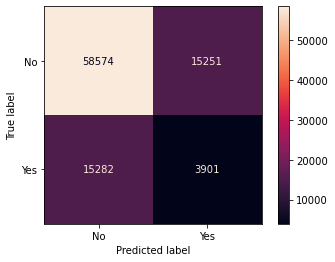

In [52]:
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train_KNNI, y_train)

plot_confusion_matrix(baseline, X_train_KNNI, y_train, cmap='rocket');


Accuracy
Baseline: 0.672 
Recall
Baseline: 0.203 
Precision
Baseline: 0.204 
F1 Score
Baseline: 0.204 



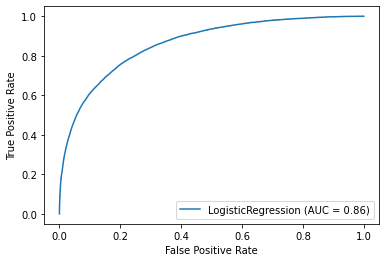

In [73]:
plot_roc_curve(logreg_model, X_train_KNNI, y_train);
baseline_accuracy = accuracy_score(y_train, baseline.predict(X_train_KNNI))
baseline_recall = recall_score(y_train, baseline.predict(X_train_KNNI),pos_label="Yes")
baseline_precision = precision_score(y_train, baseline.predict(X_train_KNNI),pos_label="Yes")
baseline_f1 = f1_score(y_train, baseline.predict(X_train_KNNI),pos_label="Yes")
print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} 
Recall
Baseline: {baseline_recall:1.3f} 
Precision
Baseline: {baseline_precision:1.3f} 
F1 Score
Baseline: {baseline_f1:1.3f} 
""")

## Simple Linear Regression

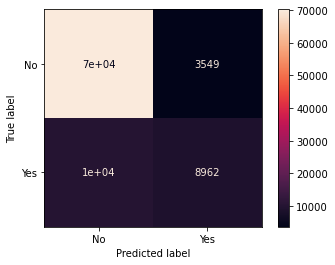

In [66]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)
plot_confusion_matrix(logreg_model, X_train_scaled, y_train, cmap='rocket');


Accuracy
Simple Linear Regression: 0.852 
Recall
Simple Linear Regression: 0.467 
Precision
Simple Linear Regression: 0.716 
F1 Score
Simple Linear Regression: 0.566 



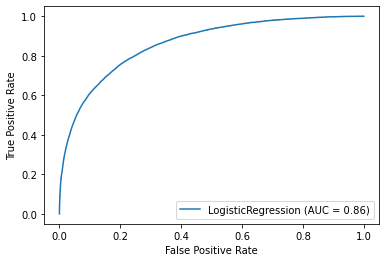

In [81]:
plot_roc_curve(logreg_model, X_train_scaled, y_train);
logreg_model_accuracy = accuracy_score(y_train, logreg_model.predict(X_train_scaled))
logreg_model_recall = recall_score(y_train, logreg_model.predict(X_train_scaled),pos_label="Yes")
logreg_model_precision = precision_score(y_train, logreg_model.predict(X_train_scaled),pos_label="Yes")
logreg_model_f1 = f1_score(y_train, logreg_model.predict(X_train_scaled),pos_label="Yes")
print(f"""
Accuracy
Simple Linear Regression: {logreg_model_accuracy:1.3f} 
Recall
Simple Linear Regression: {logreg_model_recall:1.3f} 
Precision
Simple Linear Regression: {logreg_model_precision:1.3f} 
F1 Score
Simple Linear Regression: {logreg_model_f1:1.3f} 
""")

## Using SMOTE to Balance

In [75]:
print('Raw counts: \n')
print(y_train.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(y_train.value_counts(normalize=True))

Raw counts: 

No     73825
Yes    19183
Name: RainTomorrow, dtype: int64
-----------------------------------
Normalized counts: 

No     0.793749
Yes    0.206251
Name: RainTomorrow, dtype: float64


In [77]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train)

In [79]:
print('Original class distribution: \n')
print(y_train.value_counts())
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

No     73825
Yes    19183
Name: RainTomorrow, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

No     73825
Yes    73825
Name: RainTomorrow, dtype: int64


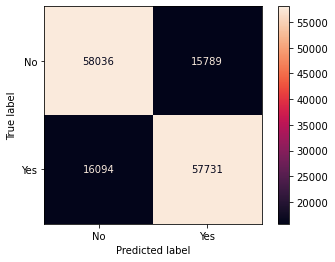

In [85]:
SMOTE_model = LogisticRegression(random_state=42, max_iter=1000)
SMOTE_model.fit(X_train_resampled, y_train_resampled)
plot_confusion_matrix(SMOTE_model, X_train_resampled, y_train_resampled, cmap='rocket');


Accuracy
SMOTE Model: 0.709 
Recall
SMOTE Model: 0.466 
Precision
SMOTE Model: 0.906 
F1 Score
SMOTE Model: 0.616 



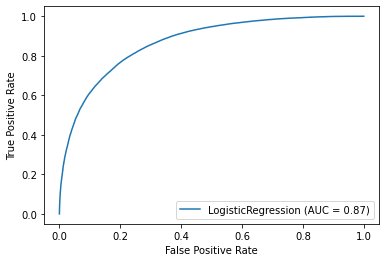

In [86]:
plot_roc_curve(SMOTE_model, X_train_resampled, y_train_resampled);
SMOTE_model_accuracy = accuracy_score(y_train_resampled, logreg_model.predict(X_train_resampled))
SMOTE_model_recall = recall_score(y_train_resampled, logreg_model.predict(X_train_resampled),pos_label="Yes")
SMOTE_model_precision = precision_score(y_train_resampled, logreg_model.predict(X_train_resampled),pos_label="Yes")
SMOTE_model_f1 = f1_score(y_train_resampled, logreg_model.predict(X_train_resampled),pos_label="Yes")
print(f"""
Accuracy
SMOTE Model: {SMOTE_model_accuracy:1.3f} 
Recall
SMOTE Model: {SMOTE_model_recall:1.3f} 
Precision
SMOTE Model: {SMOTE_model_precision:1.3f} 
F1 Score
SMOTE Model: {SMOTE_model_f1:1.3f} 
""")